# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **27.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **29.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 8.5 с хвостиком (может 9((()

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [4]:
%load_ext autoreload

In [147]:
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from descents import get_descent
from linear_regression import LinearRegression

In [6]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [7]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [8]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)
assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/29933/run-report/55359917/


* **StochasticDescent**: https://contest.yandex.ru/contest/29933/run-report/55359640/


* **MomentumDescent**: https://contest.yandex.ru/contest/29933/run-report/55360005/


* **Adam**: https://contest.yandex.ru/contest/29933/run-report/55360106/


* **LinearRegression**: https://contest.yandex.ru/contest/29933/run-report/55361932/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов , постройте графики зависимости целевой переменной от признака, распределения значений признака;
    
    1. ячейка 8 колонка dtype
    2. done
    
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    
    все полезны кроме модели. выбросы больше 40000 price и меньше 4 log_price удалены. 
    
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    
    
     OneHotEncoder, standardScaler и вручную оьработала прищнаки у которых есть линейная зависимость
    
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [135]:
data = pd.read_csv('autos.csv')

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


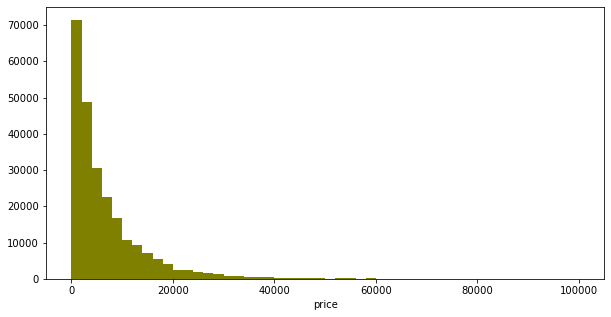

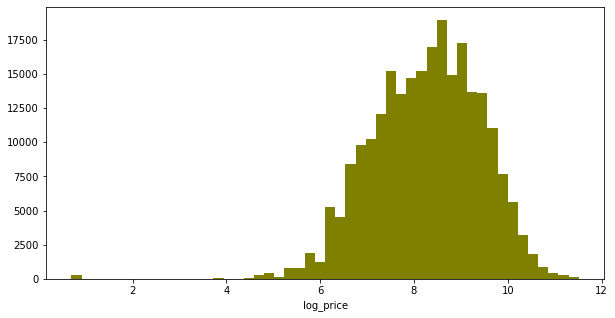

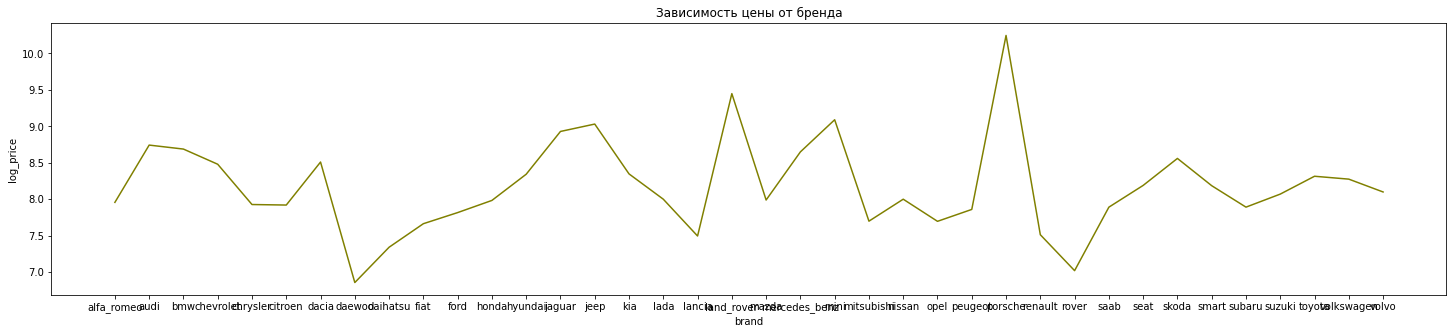

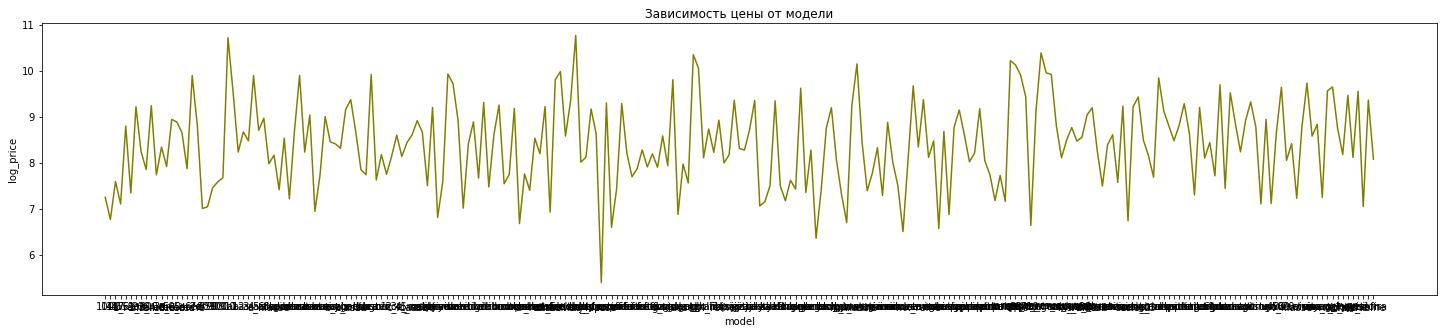

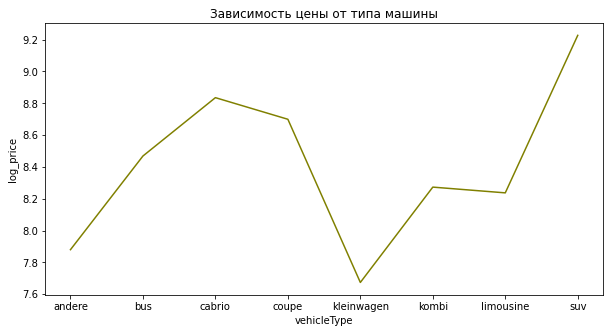

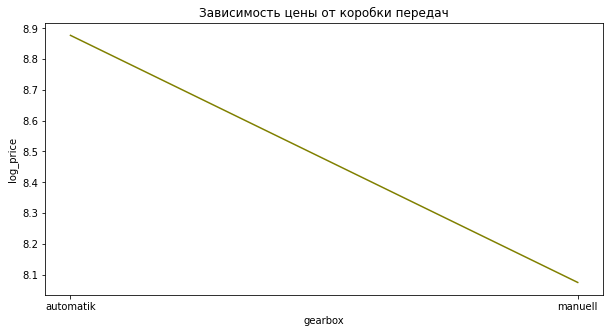

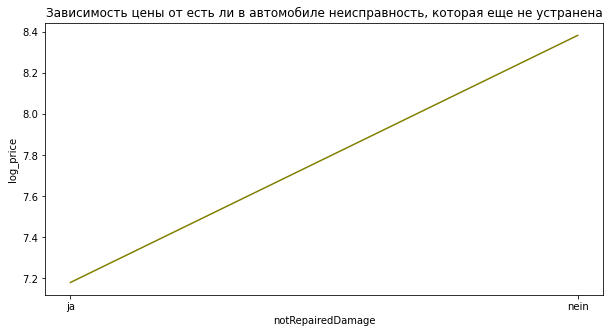

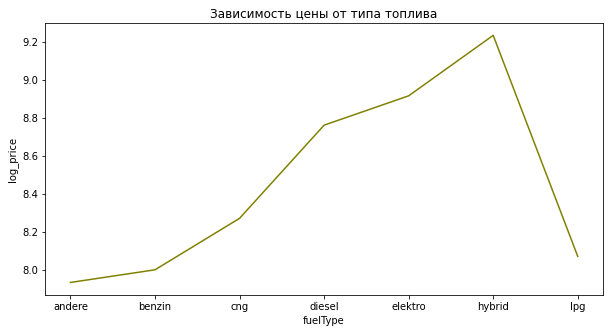

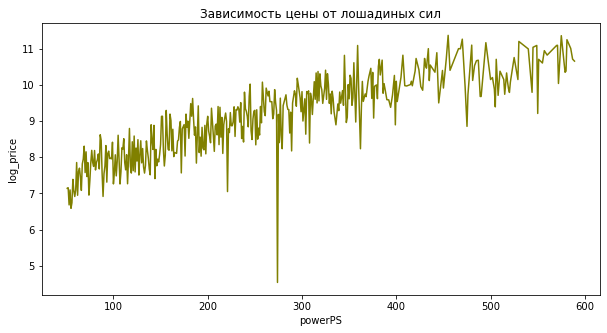

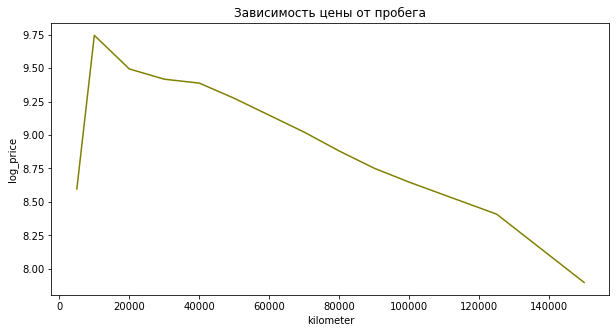

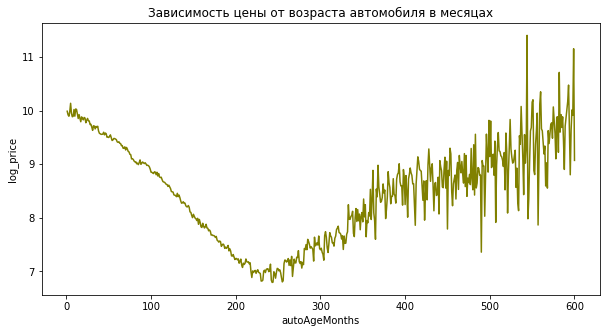

In [137]:
import seaborn as sns
plt.hist(data['price'].values, bins=50, color="olive")
plt.xlabel('price')
plt.show()
#видим что больше 40000 выбросы-удаляем

data['log_price'] = np.log1p(data['price'].values)
plt.hist(data['log_price'].values, bins=50, color='olive')
plt.xlabel('log_price')
plt.show()
#удаляем выбросы до 4

plt.figure(figsize = (25,5))
brands = pd.DataFrame(data.groupby(data['brand'])['log_price'].mean())
brands.reset_index(inplace=True)
ax = sns.lineplot(data=brands, y='log_price', x='brand', color='olive')
plt.title('Зависимость цены от бренда')
plt.show()

plt.figure(figsize = (25,5))
models = pd.DataFrame(data.groupby(data['model'])['log_price'].mean())
models.reset_index(inplace=True)
ax = sns.lineplot(data=models, y='log_price', x='model', color='olive')
plt.title('Зависимость цены от модели')
plt.show()

plt.figure(figsize = (10,5))
vehicleTypes = pd.DataFrame(data.groupby(data['vehicleType'])['log_price'].mean())
vehicleTypes.reset_index(inplace=True)
ax = sns.lineplot(data=vehicleTypes, y='log_price', x='vehicleType', color='olive')
plt.title('Зависимость цены от типа машины')
plt.show()

plt.figure(figsize = (10,5))
gearboxs = pd.DataFrame(data.groupby(data['gearbox'])['log_price'].mean())
gearboxs.reset_index(inplace=True)
ax = sns.lineplot(data=gearboxs, y='log_price', x='gearbox', color='olive')
plt.title('Зависимость цены от коробки передач')
plt.show()

plt.figure(figsize = (10,5))
notRepairedDamages = pd.DataFrame(data.groupby(data['notRepairedDamage'])['log_price'].mean())
notRepairedDamages.reset_index(inplace=True)
ax = sns.lineplot(data=notRepairedDamages, y='log_price', x='notRepairedDamage', color='olive')
plt.title('Зависимость цены от есть ли в автомобиле неисправность, которая еще не устранена')
plt.show()

plt.figure(figsize = (10,5))
fuelTypes = pd.DataFrame(data.groupby(data['fuelType'])['log_price'].mean())
fuelTypes.reset_index(inplace=True)
ax = sns.lineplot(data=fuelTypes, y='log_price', x='fuelType', color='olive')
plt.title('Зависимость цены от типа топлива')
plt.show()

plt.figure(figsize = (10,5))
powerPSs = pd.DataFrame(data.groupby(data['powerPS'])['log_price'].mean())
powerPSs.reset_index(inplace=True)
ax = sns.lineplot(data=powerPSs, y='log_price', x='powerPS', color='olive')
plt.title('Зависимость цены от лошадиных сил')
plt.show()

plt.figure(figsize = (10,5))
kilometers = pd.DataFrame(data.groupby(data['kilometer'])['log_price'].mean())
kilometers.reset_index(inplace=True)
ax = sns.lineplot(data=kilometers, y='log_price', x='kilometer', color='olive')
plt.title('Зависимость цены от пробега')
plt.show()

plt.figure(figsize = (10,5))
autoAgeMonthss = pd.DataFrame(data.groupby(data['autoAgeMonths'])['log_price'].mean())
autoAgeMonthss.reset_index(inplace=True)
ax = sns.lineplot(data=autoAgeMonthss, y='log_price', x='autoAgeMonths', color='olive')
plt.title('Зависимость цены от возраста автомобиля в месяцах')
plt.show()

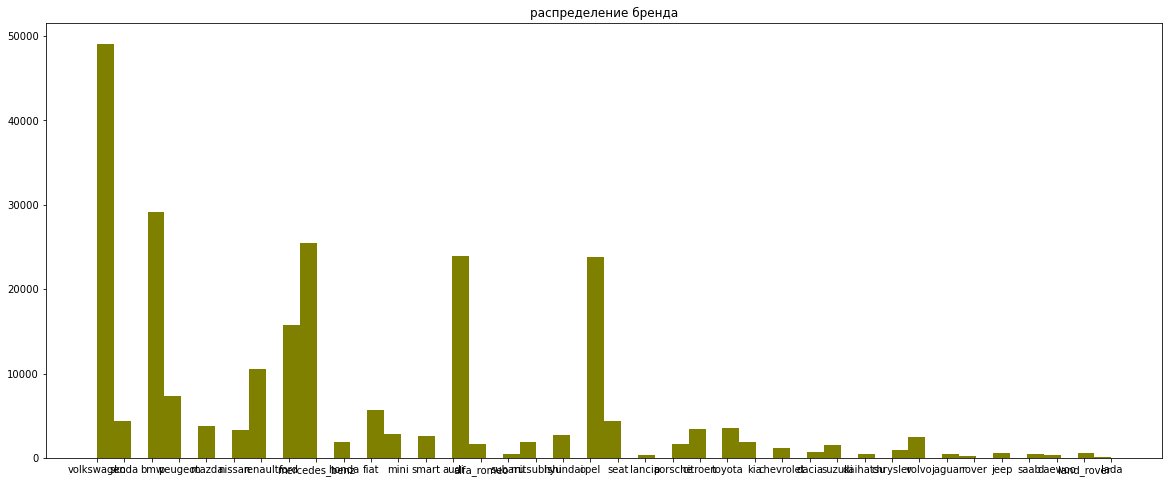

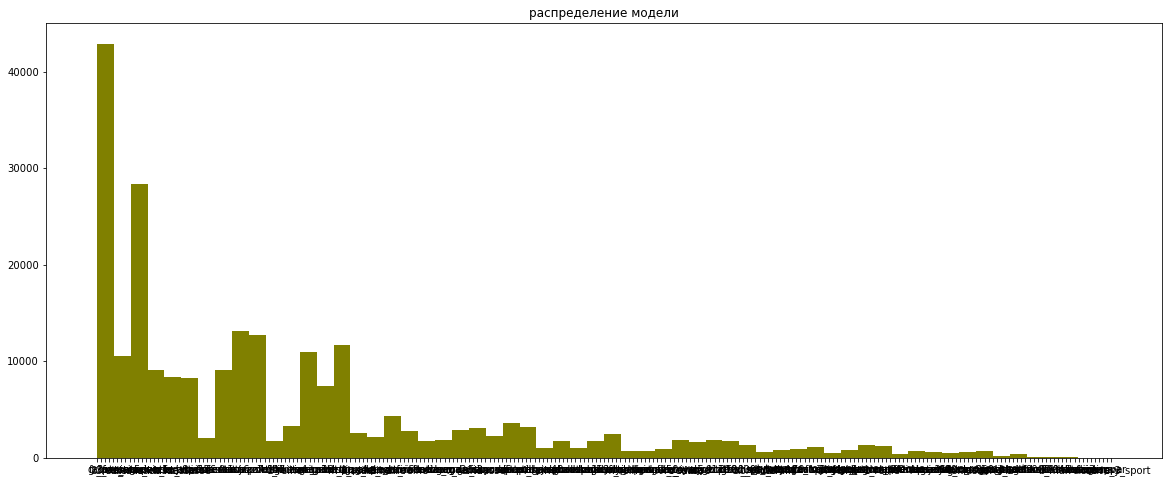

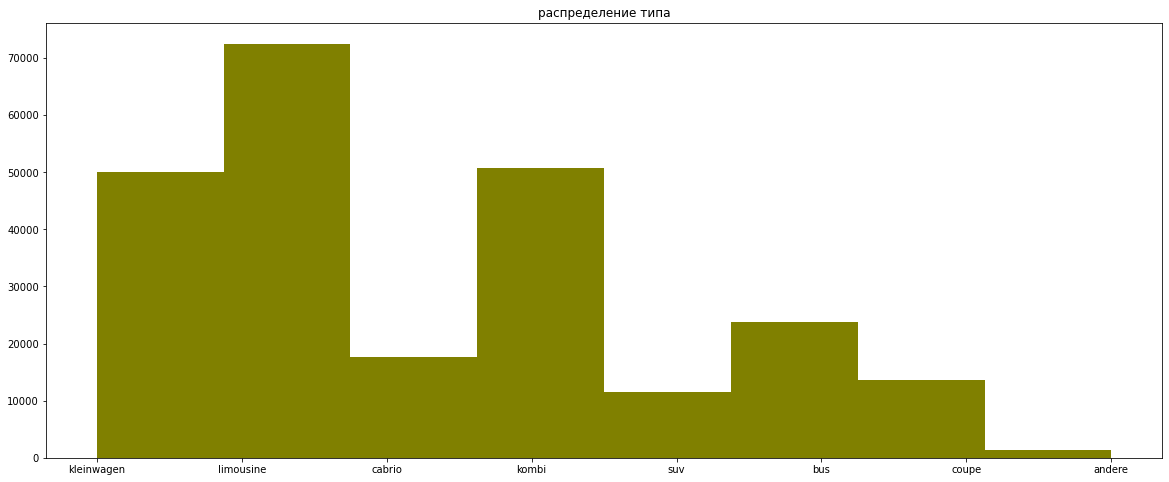

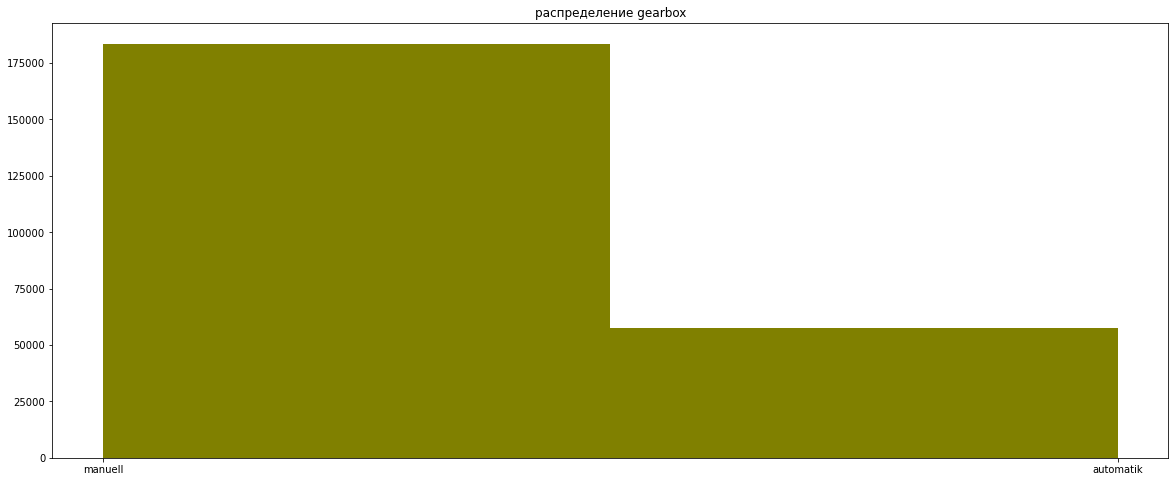

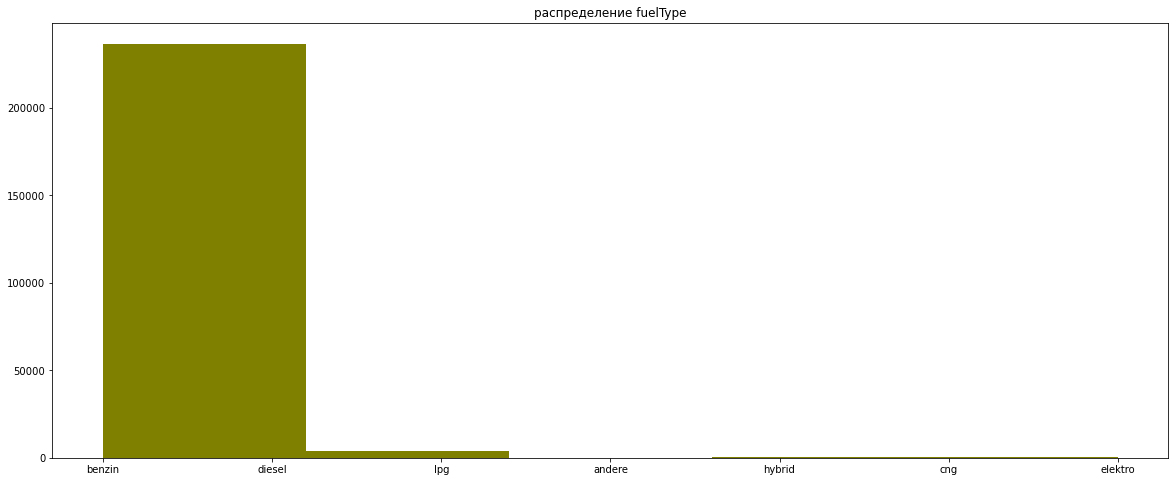

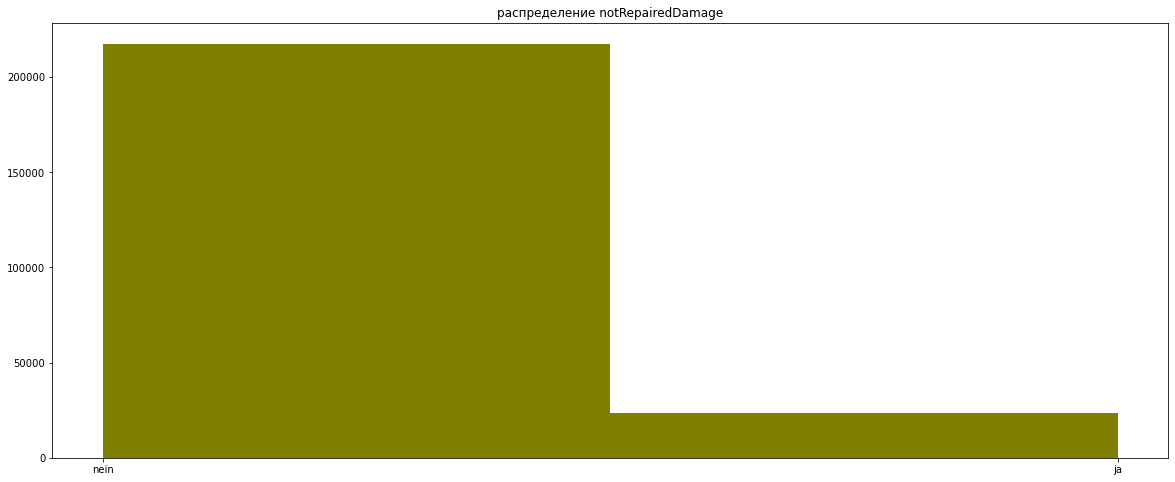

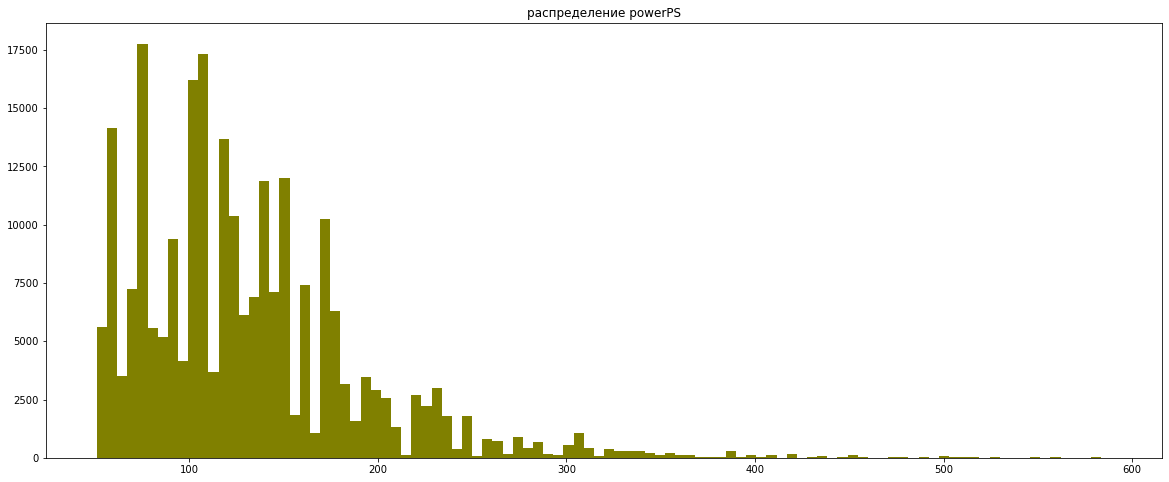

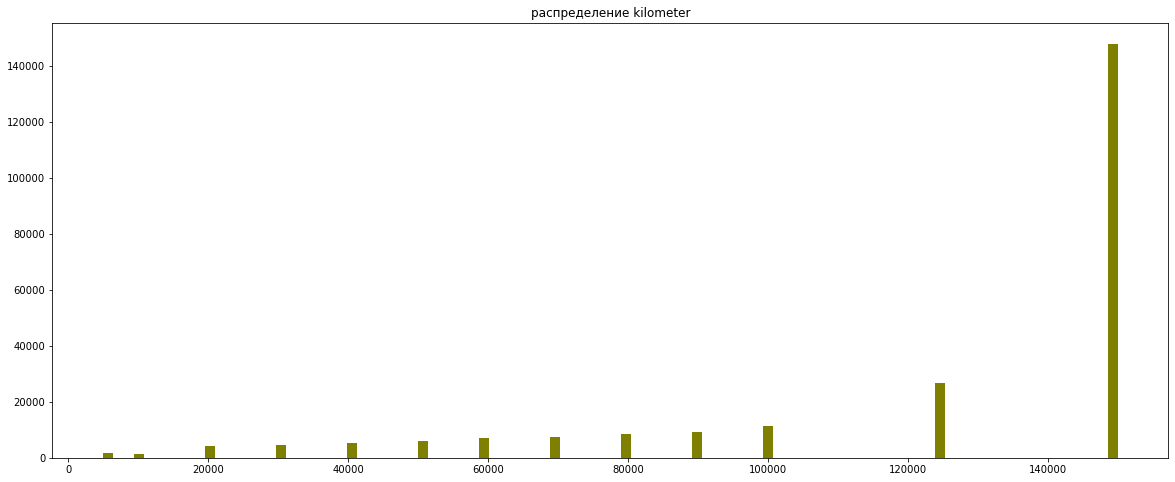

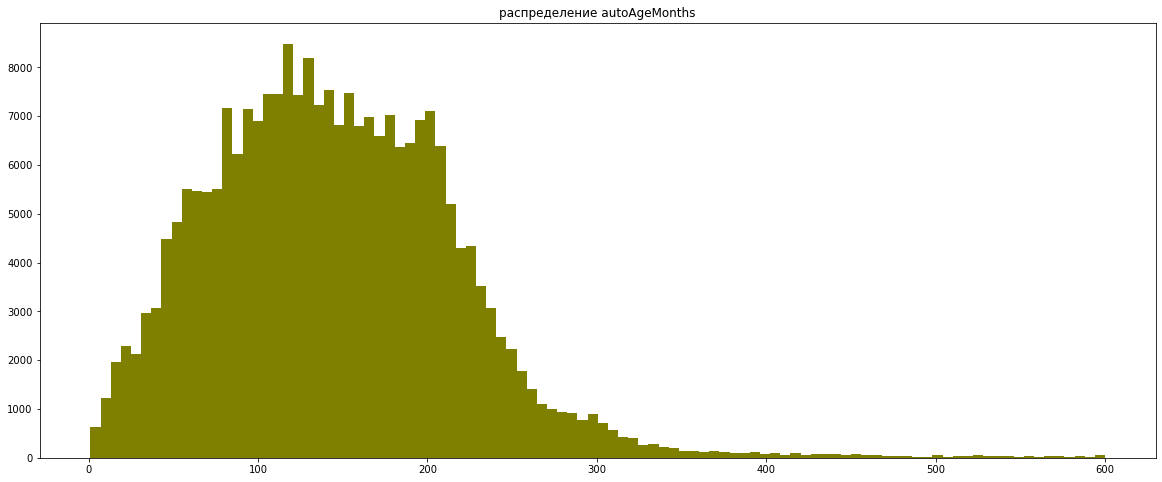

In [141]:
plt.figure(figsize = (20,8))
plt.hist(data['brand'].values, bins=60, color = 'olive')
plt.title('распределение бренда')
plt.show()

plt.figure(figsize = (20,8))
plt.hist(data['model'].values, bins=60, color = 'olive')
plt.title('распределение модели')
plt.show()

plt.figure(figsize = (20,8))
plt.hist(data['vehicleType'].values, bins=8, color = 'olive')
plt.title('распределение типа')
plt.show()

plt.figure(figsize = (20,8))
plt.hist(data['gearbox'].values, bins=2, color = 'olive')
plt.title('распределение gearbox')
plt.show()

plt.figure(figsize = (20,8))
plt.hist(data['fuelType'].values, bins=5, color = 'olive')
plt.title('распределение fuelType')
plt.show()

plt.figure(figsize = (20,8))
plt.hist(data['notRepairedDamage'].values, bins=2, color = 'olive')
plt.title('распределение notRepairedDamage')
plt.show()

plt.figure(figsize = (20,8))
plt.hist(data['powerPS'].values, bins=100, color = 'olive')
plt.title('распределение powerPS')
plt.show()

plt.figure(figsize = (20,8))
plt.hist(data['kilometer'].values, bins=100, color = 'olive')
plt.title('распределение kilometer')
plt.show()

plt.figure(figsize = (20,8))
plt.hist(data['autoAgeMonths'].values, bins=100, color = 'olive')
plt.title('распределение autoAgeMonths')
plt.show()

In [12]:
data = data[(data['price'] < 40000) & (data['log_price'] > 4)]
del data['model']
del data['price']

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [88]:
data.head(2)

,brand,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,log_price
0,volkswagen,kleinwagen,manuell,benzin,nein,75,150000,177,7.313887
1,skoda,kleinwagen,manuell,diesel,nein,69,90000,93,8.188967


In [89]:
categorical = ['brand', 'kilometer', 'autoAgeMonths']
other = ['notRepairedDamage', 'vehicleType', 'gearbox', 'fuelType']
numeric = ['powerPS']


In [90]:
x = data[categorical + numeric + other]
y = data['log_price']


In [91]:
data.fuelType.unique()

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)

In [92]:
mappings = {
    'notRepairedDamage': {'ja': 1, 'nein': 0},
    'vehicleType' : {'kleinwagen': 0, 'andere': 1, 'limousine': 2, 'kombi': 3, 
                     'bus': 4, 'coupe': 5, 'cabrio': 6, 'suv': 7},
    'gearbox': {'automatik': 1, 'manuell': 0},
    'fuelType': {'andere': 0, 'benzin': 1, 'lpg': 2, 'cng': 3, 'diesel': 4, 'elektro': 5, 'hybrid': 6}
}


In [93]:
for column in mappings:
    x[column] = x[column].apply(lambda x: mappings[column][x])

/var/folders/vr/gh68th1d5xg726gd_fhdrsgm0000gn/T/ipykernel_2906/3992815907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = x[column].apply(lambda x: mappings[column][x])


In [94]:
x.head(2)

,brand,kilometer,autoAgeMonths,powerPS,notRepairedDamage,vehicleType,gearbox,fuelType
0,volkswagen,150000,177,75,0,0,0,1
1,skoda,90000,93,69,0,0,0,4


In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
])

x = column_transformer.fit_transform(x)

In [96]:
x = x.toarray()

In [98]:
x_t = np.concatenate((x, np.ones(len(x))[:, None]), axis=1)

In [99]:
x_t.shape

(238900, 644)

In [100]:
x = x_t

In [110]:
x.shape

(238900, 644)

In [111]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=12345)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [112]:
y_train = y_train.values
y_valid = y_valid.values
y_test = y_test.values

In [113]:
dim = x_train.shape[1]


In [114]:
from tqdm import tqdm

In [115]:
from sklearn.metrics import mean_squared_error, r2_score
import math

descents = [
    'full',
    'stochastic',
    'momentum',
    'adam'
]

lambda_spaces = {
    'full':   np.logspace(0.,  0.3,  10),
    'stochastic': np.logspace(-2., -0.5, 10),
    'momentum':   np.logspace(0,   0.4,  10),
    'adam':    np.logspace(0,   4,    10),
}

best_lambdas = {
    'full':   None,
    'stochastic': None,
    'momentum':   None,
    'adam':    None,
}

for descent in descents:
    best_loss = math.inf

    for _lambda in tqdm(lambda_spaces[descent]):
        cfg = {
            'descent_name': descent,
            'kwargs': {'dimension': dim, 'lambda_': _lambda}
        }
        
        linreg = LinearRegression(descent_config=cfg)
        linreg.fit(x_train, y_train)
        loss = mean_squared_error(y_valid, linreg.predict(x_valid))

        print(
            '---- {} descent ----\n'.format(descent),
            '    lambda: {}\n'.format(_lambda),
            '      loss: {}\n'.format(loss),
            '     steps: {}\n'.format(len(linreg.loss_history)),
        )

        if loss < best_loss:
            best_loss = loss
            best_lambdas[descent] = _lambda

 10%|████▍                                       | 1/10 [00:08<01:13,  8.11s/it]

---- full descent ----
     lambda: 1.0
       loss: 0.5762957530747109
      steps: 71



 20%|████████▊                                   | 2/10 [00:16<01:04,  8.02s/it]

---- full descent ----
     lambda: 1.0797751623277096
       loss: 0.5893918641293925
      steps: 69



 30%|█████████████▏                              | 3/10 [00:24<00:58,  8.43s/it]

---- full descent ----
     lambda: 1.1659144011798317
       loss: 0.5943777469676691
      steps: 79



 40%|█████████████████▌                          | 4/10 [00:35<00:54,  9.15s/it]

---- full descent ----
     lambda: 1.2589254117941673
       loss: 0.5970207778725464
      steps: 91



 50%|██████████████████████                      | 5/10 [00:45<00:48,  9.61s/it]

---- full descent ----
     lambda: 1.3593563908785256
       loss: 0.5717661296887786
      steps: 93



 60%|██████████████████████████▍                 | 6/10 [00:56<00:39,  9.95s/it]

---- full descent ----
     lambda: 1.4677992676220695
       loss: 0.5458945816489152
      steps: 94



 70%|██████████████████████████████▊             | 7/10 [01:07<00:30, 10.21s/it]

---- full descent ----
     lambda: 1.5848931924611136
       loss: 0.5542943504041266
      steps: 95



 80%|███████████████████████████████████▏        | 8/10 [01:18<00:21, 10.57s/it]

---- full descent ----
     lambda: 1.7113283041617808
       loss: 0.5294113138064636
      steps: 100



 90%|███████████████████████████████████████▌    | 9/10 [01:31<00:11, 11.22s/it]

---- full descent ----
     lambda: 1.847849797422291
       loss: 0.5354689065253612
      steps: 109



100%|███████████████████████████████████████████| 10/10 [01:44<00:00, 10.40s/it]


---- full descent ----
     lambda: 1.9952623149688795
       loss: 0.5062372666410104
      steps: 109



 10%|████▍                                       | 1/10 [00:03<00:29,  3.33s/it]

---- stochastic descent ----
     lambda: 0.01
       loss: 16.146836610825734
      steps: 78



 20%|████████▊                                   | 2/10 [00:07<00:30,  3.87s/it]

---- stochastic descent ----
     lambda: 0.014677992676220698
       loss: 12.281955992523791
      steps: 104



 30%|█████████████▏                              | 3/10 [00:11<00:27,  3.90s/it]

---- stochastic descent ----
     lambda: 0.021544346900318832
       loss: 6.433806994750429
      steps: 91



 40%|█████████████████▌                          | 4/10 [00:15<00:23,  3.84s/it]

---- stochastic descent ----
     lambda: 0.03162277660168379
       loss: 4.319697046159401
      steps: 95



 50%|██████████████████████                      | 5/10 [00:17<00:16,  3.40s/it]

---- stochastic descent ----
     lambda: 0.046415888336127774
       loss: 3.7697056282785195
      steps: 69



 60%|██████████████████████████▍                 | 6/10 [00:20<00:12,  3.13s/it]

---- stochastic descent ----
     lambda: 0.06812920690579612
       loss: 2.5757070845949483
      steps: 69



 70%|██████████████████████████████▊             | 7/10 [00:24<00:10,  3.35s/it]

---- stochastic descent ----
     lambda: 0.1
       loss: 1.827344785952635
      steps: 95



 80%|███████████████████████████████████▏        | 8/10 [00:28<00:06,  3.49s/it]

---- stochastic descent ----
     lambda: 0.1467799267622069
       loss: 1.2626359450047737
      steps: 98



 90%|███████████████████████████████████████▌    | 9/10 [00:32<00:03,  3.83s/it]

---- stochastic descent ----
     lambda: 0.21544346900318834
       loss: 0.8722487952749185
      steps: 121



100%|███████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


---- stochastic descent ----
     lambda: 0.31622776601683794
       loss: 0.7417956631302128
      steps: 144



 10%|████▍                                       | 1/10 [00:28<04:12, 28.04s/it]

---- momentum descent ----
     lambda: 1.0
       loss: 0.3059278897226308
      steps: 234



 20%|████████▊                                   | 2/10 [00:55<03:42, 27.76s/it]

---- momentum descent ----
     lambda: 1.107756850509709
       loss: 0.29996583226542295
      steps: 237



 30%|█████████████▏                              | 3/10 [01:22<03:11, 27.32s/it]

---- momentum descent ----
     lambda: 1.22712523985119
       loss: 0.2915212031350647
      steps: 231



 40%|█████████████████▌                          | 4/10 [01:48<02:42, 27.03s/it]

---- momentum descent ----
     lambda: 1.3593563908785256
       loss: 0.28502828969901367
      steps: 229



 50%|██████████████████████                      | 5/10 [02:15<02:14, 26.94s/it]

---- momentum descent ----
     lambda: 1.5058363542798405
       loss: 0.2833255000123906
      steps: 235



 60%|██████████████████████████▍                 | 6/10 [02:43<01:48, 27.18s/it]

---- momentum descent ----
     lambda: 1.6681005372000588
       loss: 0.2792450986283735
      steps: 240



 70%|██████████████████████████████▊             | 7/10 [03:10<01:21, 27.05s/it]

---- momentum descent ----
     lambda: 1.847849797422291
       loss: 0.27572414240628956
      steps: 234



 80%|███████████████████████████████████▏        | 8/10 [03:36<00:53, 26.85s/it]

---- momentum descent ----
     lambda: 2.046968271807521
       loss: 0.2723392383298235
      steps: 226



 90%|███████████████████████████████████████▌    | 9/10 [04:05<00:27, 27.52s/it]

---- momentum descent ----
     lambda: 2.2675431258708016
       loss: 0.270960998600962
      steps: 234



100%|███████████████████████████████████████████| 10/10 [04:32<00:00, 27.21s/it]


---- momentum descent ----
     lambda: 2.51188643150958
       loss: 0.26662246337270373
      steps: 226



 10%|████▍                                       | 1/10 [00:13<02:02, 13.58s/it]

---- adam descent ----
     lambda: 1.0
       loss: 0.24918908397564413
      steps: 115



 20%|████████▊                                   | 2/10 [00:26<01:47, 13.38s/it]

---- adam descent ----
     lambda: 2.7825594022071245
       loss: 0.2492367236676044
      steps: 115



 30%|█████████████▏                              | 3/10 [00:42<01:41, 14.55s/it]

---- adam descent ----
     lambda: 7.742636826811269
       loss: 0.24925327437372188
      steps: 139



 40%|█████████████████▌                          | 4/10 [01:00<01:35, 15.90s/it]

---- adam descent ----
     lambda: 21.544346900318832
       loss: 0.249230679285206
      steps: 155



 50%|██████████████████████                      | 5/10 [01:18<01:22, 16.52s/it]

---- adam descent ----
     lambda: 59.94842503189409
       loss: 0.2502760027383227
      steps: 152



 60%|██████████████████████████▍                 | 6/10 [01:35<01:07, 16.86s/it]

---- adam descent ----
     lambda: 166.81005372000593
       loss: 0.25799692095869253
      steps: 154



 70%|██████████████████████████████▊             | 7/10 [01:52<00:50, 16.89s/it]

---- adam descent ----
     lambda: 464.15888336127773
       loss: 0.46887792916583554
      steps: 144



 80%|███████████████████████████████████▏        | 8/10 [02:15<00:37, 18.83s/it]

---- adam descent ----
     lambda: 1291.5496650148827
       loss: 0.25439866960349555
      steps: 198



 90%|███████████████████████████████████████▌    | 9/10 [02:40<00:20, 20.56s/it]

---- adam descent ----
     lambda: 3593.813663804626
       loss: 0.2640012527377956
      steps: 209



100%|███████████████████████████████████████████| 10/10 [03:04<00:00, 18.45s/it]

---- adam descent ----
     lambda: 10000.0
       loss: 0.3602484152158251
      steps: 209



In [116]:
losses = dict()

for descent in descents:
    cfg = {
        'descent_name': descent,
        'kwargs': {'dimension': dim, 'lambda_': best_lambdas[descent]}
    }

    linreg = LinearRegression(descent_config=cfg)
    linreg.fit(x_train, y_train)

    forecs_train = linreg.predict(x_train)
    forecs_test = linreg.predict(x_test)
    print(
        '---- {} descent ----\n'.format(descent),
        '    lambda train: {}   '.format(best_lambdas[descent]), 'lambda test: {}\n'.format(best_lambdas[descent]),
        '    MSE train   : {}   '.format(mean_squared_error(y_train, forecs_train)), '   MSE test: {}\n'.format(mean_squared_error(y_test, forecs_test)),
        '    R-squared   : {}'.format(r2_score(y_train, forecs_train)),  '      R-squared: {}\n'.format(r2_score(y_test, forecs_test))
    )

    losses[descent] = linreg.loss_history

---- full descent ----
     lambda train: 1.9952623149688795    lambda test: 1.9952623149688795
     MSE train   : 0.5200348249035642       MSE test: 0.5162922761577785
     R-squared   : 0.5712438164305326       R-squared: 0.5748174371056265

---- stochastic descent ----
     lambda train: 0.31622776601683794    lambda test: 0.31622776601683794
     MSE train   : 0.820439168706744       MSE test: 0.8184897176897872
     R-squared   : 0.3235676728172151       R-squared: 0.3259485529012929

---- momentum descent ----
     lambda train: 2.51188643150958    lambda test: 2.51188643150958
     MSE train   : 0.26543879485974103       MSE test: 0.26874776791126737
     R-squared   : 0.7811521090410702       R-squared: 0.7786779504372537

---- adam descent ----
     lambda train: 1.0    lambda test: 1.0
     MSE train   : 0.24656363978820456       MSE test: 0.2511205801872641
     R-squared   : 0.7967142196252116       R-squared: 0.7931944814783294



### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

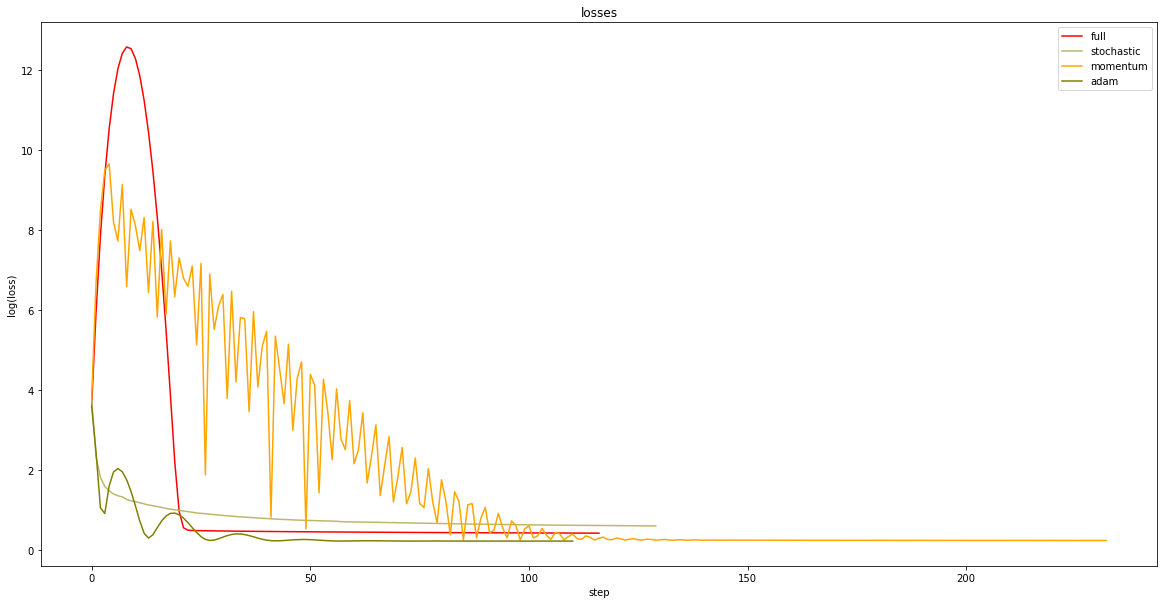

In [117]:
plt.figure(figsize=(20, 10))
lines = list()
col = {'full' : 'red', 'stochastic': 'darkkhaki', 'momentum': 'orange', 'adam': 'olive'  
}
for descent in losses:
    line, = plt.plot(range(len(losses[descent])), np.log1p(losses[descent]), label=descent, color=col[descent])
    lines.append(line)
plt.legend(handles=lines)
plt.title('losses')
plt.xlabel('step')
plt.ylabel('log(loss)')
plt.show()

**Вывод:** на основе проделанных экспериментов можно сделать следующие выводы:

- метод оптимизации Адам показывает себя наилучшим с точки зрения скорости сходимости (в терминах кол-ва итераций)

- следующим по качеству идет метод оптимизации с инерцией, однако (предположительно из-за большого лернинг рейта) траектория оптимизации не гладкая

- для градиентного спуска по всему датасету необходимо тщательно подбирать лернинг рейт, так как значения градиентов получаются слишком большими и могут "перепрыгнуть" оптимум 

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [118]:
best_lambdas

{'full': 1.9952623149688795,
 'stochastic': 0.31622776601683794,
 'momentum': 2.51188643150958,
 'adam': 1.0}

In [119]:
from time import time
batch_sizes = np.arange(5, 500, 10)
mean_times = np.empty(batch_sizes.shape)
times_std = np.empty(batch_sizes.shape)

mean_iters = np.empty(batch_sizes.shape)
iters_std = np.empty(batch_sizes.shape)

mean_losses = np.empty(batch_sizes.shape)

for i in tqdm(range(batch_sizes.shape[0])):

    batch_times = np.empty(5)
    batch_iters = np.empty(5)
    batch_losses = np.empty(5)
    for j in tqdm(range(5)):
        cfg = {
        'descent_name': 'stochastic',
        'kwargs': {'dimension': dim, 'lambda_': 0.31622776601683794, 'batch_size': batch_sizes[i]}
        }
        linreg = LinearRegression(descent_config=cfg)
        start = time()
        linreg.fit(x_train, y_train)
        batch_times[j] = time() - start

        loss = mean_squared_error(y_valid, linreg.predict(x_valid))

        batch_iters[j] = len(linreg.loss_history)
        batch_losses[j] = loss

    mean_times[i] = batch_times.mean()
    times_std[i] = np.std(batch_times)

    mean_iters[i] = batch_iters.mean()
    iters_std[i] = np.std(batch_iters)

    mean_losses[i] = batch_losses.mean()



  0%|                                                                         | 0/5 [00:00<?, ?it/s]


 40%|██████████████████████████                                       | 2/5 [00:07<00:10,  3.51s/it]


 80%|████████████████████████████████████████████████████             | 4/5 [00:14<00:03,  3.59s/it]


 90%|████████████████████████████████████████████████████████▋      | 45/50 [15:14<01:23, 16.74s/it]


100%|███████████████████████████████████████████████████████████████| 50/50 [16:37<00:00, 19.95s/it]


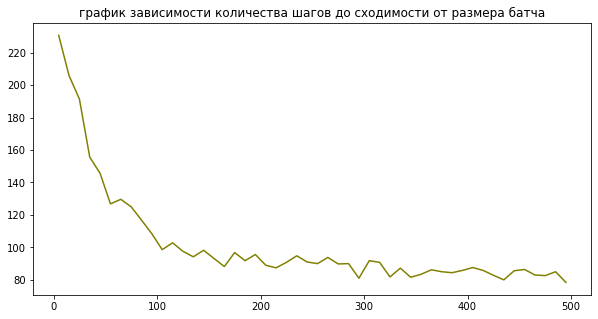

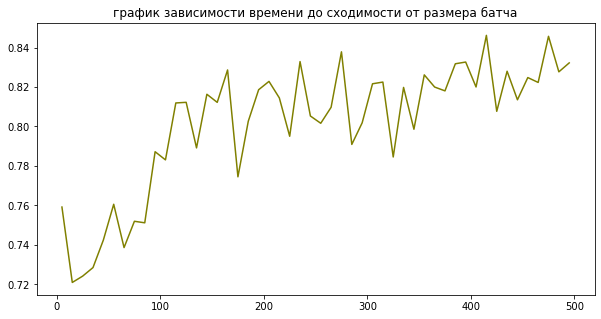

In [124]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(batch_sizes, mean_iters, color='olive')
plt.title("график зависимости количества шагов до сходимости от размера батча")
plt.show()
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(batch_sizes, mean_losses, color='olive')
plt.title("график зависимости времени до сходимости от размера батча")
plt.show()

**Вывод:** выводы, в принципе, очевидные: с увеличением размера минибатча увеличивается необходимое время на оптимизацию (причем незначительно, т.к. можно использовать параллельность матричных вычислений), при этом с бОльшим размером батча требуется меньше итераций до сходимости

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку: https://contest.yandex.ru/contest/29933/run-report/55540830/

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?




In [151]:
from sklearn.metrics import mean_squared_error, r2_score
import math

descents = [
    'full',
    'stochastic',
    'momentum',
    'adam'
]

lambda_spaces = {
    'full':   np.logspace(0.,  0.3,  10),
    'stochastic': np.logspace(-2., -0.5, 10),
    'momentum':   np.logspace(0,   0.4,  10),
    'adam':    np.logspace(0,   4,    10),
}

best_lambdas = {
    'full':   None,
    'stochastic': None,
    'momentum':   None,
    'adam':    None,
}
best_mus = []
best_lambda_reg = []
for descent in descents:
    best_loss = math.inf
    best_mu = -1
    for mu in np.logspace(-4, -1, 5):
        for _lambda in tqdm(lambda_spaces[descent]):
            cfg = {
                'descent_name': descent, 'regularized': True,
                'kwargs': {'dimension': dim, 'lambda_': _lambda, 'mu': mu}
            }
            cfg1 = {
                'descent_name': descent, 'regularized': True,
                'kwargs': {'dimension': dim, 'lambda_': _lambda, 'batch_size': 70, 'mu': mu}
            }
            if descent == 'stochastic':
                linreg = LinearRegression(descent_config=cfg1)
            else:
                linreg = LinearRegression(descent_config=cfg)
            linreg.fit(x_train, y_train)
            loss = mean_squared_error(y_valid, linreg.predict(x_valid))

            print(
                '---- {} descent ----\n'.format(descent),
                '    lambda: {}\n'.format(_lambda),
                '        mu: {}\n'.format(mu),
                '      loss: {}\n'.format(loss),
                '     steps: {}\n'.format(len(linreg.loss_history)),
            )

            if loss < best_loss:
                best_loss = loss
                best_lambdas[descent] = _lambda
    best_mus.append(best_mu)
    best_lambda_reg.append(best_lambda)
    print("\nbest params for", func_name, "is mu =", best_mu, "and lambda=", best_lambda, "\n")

 10%|██████▍                                                         | 1/10 [00:37<05:38, 37.56s/it]

---- full descent ----
     lambda: 1.0
         mu: 0.0001
       loss: 0.9399407723672676
      steps: 301



 20%|████████████▊                                                   | 2/10 [01:13<04:51, 36.41s/it]

---- full descent ----
     lambda: 1.0797751623277096
         mu: 0.0001
       loss: 0.8843524196276753
      steps: 301



 30%|███████████████████▏                                            | 3/10 [01:49<04:14, 36.42s/it]

---- full descent ----
     lambda: 1.1659144011798317
         mu: 0.0001
       loss: 0.838185931058778
      steps: 301



 40%|█████████████████████████▌                                      | 4/10 [02:26<03:39, 36.60s/it]

---- full descent ----
     lambda: 1.2589254117941673
         mu: 0.0001
       loss: 0.7871677335656643
      steps: 301



 50%|████████████████████████████████                                | 5/10 [03:02<03:02, 36.55s/it]

---- full descent ----
     lambda: 1.3593563908785256
         mu: 0.0001
       loss: 0.7506564790318168
      steps: 301



 60%|██████████████████████████████████████▍                         | 6/10 [03:39<02:26, 36.62s/it]

---- full descent ----
     lambda: 1.4677992676220695
         mu: 0.0001
       loss: 0.6965596371508572
      steps: 301



 70%|████████████████████████████████████████████▊                   | 7/10 [04:16<01:50, 36.78s/it]

---- full descent ----
     lambda: 1.5848931924611136
         mu: 0.0001
       loss: 0.675199360146776
      steps: 301



 80%|███████████████████████████████████████████████████▏            | 8/10 [04:52<01:12, 36.45s/it]

---- full descent ----
     lambda: 1.7113283041617808
         mu: 0.0001
       loss: 0.6161185678919779
      steps: 301



 90%|█████████████████████████████████████████████████████████▌      | 9/10 [05:30<00:36, 36.85s/it]

---- full descent ----
     lambda: 1.847849797422291
         mu: 0.0001
       loss: 0.5736989122553661
      steps: 301



100%|███████████████████████████████████████████████████████████████| 10/10 [06:06<00:00, 36.70s/it]


---- full descent ----
     lambda: 1.9952623149688795
         mu: 0.0001
       loss: 0.5559338951981955
      steps: 301



 10%|██████▍                                                         | 1/10 [00:36<05:29, 36.61s/it]

---- full descent ----
     lambda: 1.0
         mu: 0.0005623413251903491
       loss: 0.9767483411641721
      steps: 301



 20%|████████████▊                                                   | 2/10 [01:12<04:51, 36.45s/it]

---- full descent ----
     lambda: 1.0797751623277096
         mu: 0.0005623413251903491
       loss: 0.9339713684703419
      steps: 301



 30%|███████████████████▏                                            | 3/10 [01:49<04:14, 36.39s/it]

---- full descent ----
     lambda: 1.1659144011798317
         mu: 0.0005623413251903491
       loss: 0.8551063094308288
      steps: 301



 40%|█████████████████████████▌                                      | 4/10 [02:23<03:33, 35.54s/it]

---- full descent ----
     lambda: 1.2589254117941673
         mu: 0.0005623413251903491
       loss: 0.7662763018561163
      steps: 301



 50%|████████████████████████████████                                | 5/10 [02:57<02:55, 35.05s/it]

---- full descent ----
     lambda: 1.3593563908785256
         mu: 0.0005623413251903491
       loss: 0.744093802871217
      steps: 301



 60%|██████████████████████████████████████▍                         | 6/10 [03:35<02:23, 35.97s/it]

---- full descent ----
     lambda: 1.4677992676220695
         mu: 0.0005623413251903491
       loss: 0.7274469082721305
      steps: 301



 70%|████████████████████████████████████████████▊                   | 7/10 [04:10<01:46, 35.66s/it]

---- full descent ----
     lambda: 1.5848931924611136
         mu: 0.0005623413251903491
       loss: 0.6694699666820544
      steps: 301



 80%|███████████████████████████████████████████████████▏            | 8/10 [04:46<01:11, 35.73s/it]

---- full descent ----
     lambda: 1.7113283041617808
         mu: 0.0005623413251903491
       loss: 0.636645805363224
      steps: 301



 90%|█████████████████████████████████████████████████████████▌      | 9/10 [05:21<00:35, 35.59s/it]

---- full descent ----
     lambda: 1.847849797422291
         mu: 0.0005623413251903491
       loss: 0.6051063337118752
      steps: 301



100%|███████████████████████████████████████████████████████████████| 10/10 [05:56<00:00, 35.62s/it]


---- full descent ----
     lambda: 1.9952623149688795
         mu: 0.0005623413251903491
       loss: 0.5585223526169022
      steps: 301



 10%|██████▍                                                         | 1/10 [00:35<05:20, 35.59s/it]

---- full descent ----
     lambda: 1.0
         mu: 0.0031622776601683794
       loss: 1.0316522380505473
      steps: 301



 20%|████████████▊                                                   | 2/10 [01:11<04:44, 35.62s/it]

---- full descent ----
     lambda: 1.0797751623277096
         mu: 0.0031622776601683794
       loss: 0.9721020022713133
      steps: 301



 30%|███████████████████▏                                            | 3/10 [01:47<04:10, 35.84s/it]

---- full descent ----
     lambda: 1.1659144011798317
         mu: 0.0031622776601683794
       loss: 0.9498140366318444
      steps: 301



 40%|█████████████████████████▌                                      | 4/10 [02:22<03:34, 35.70s/it]

---- full descent ----
     lambda: 1.2589254117941673
         mu: 0.0031622776601683794
       loss: 0.8740621041080084
      steps: 301



 50%|████████████████████████████████                                | 5/10 [02:57<02:56, 35.23s/it]

---- full descent ----
     lambda: 1.3593563908785256
         mu: 0.0031622776601683794
       loss: 0.8390542057807728
      steps: 301



 60%|██████████████████████████████████████▍                         | 6/10 [03:31<02:19, 34.92s/it]

---- full descent ----
     lambda: 1.4677992676220695
         mu: 0.0031622776601683794
       loss: 0.7711619584699612
      steps: 301



 70%|████████████████████████████████████████████▊                   | 7/10 [04:05<01:44, 34.71s/it]

---- full descent ----
     lambda: 1.5848931924611136
         mu: 0.0031622776601683794
       loss: 0.7437907431533036
      steps: 301



 80%|███████████████████████████████████████████████████▏            | 8/10 [04:40<01:09, 34.78s/it]

---- full descent ----
     lambda: 1.7113283041617808
         mu: 0.0031622776601683794
       loss: 0.7151915901528401
      steps: 301



 90%|█████████████████████████████████████████████████████████▌      | 9/10 [05:17<00:35, 35.28s/it]

---- full descent ----
     lambda: 1.847849797422291
         mu: 0.0031622776601683794
       loss: 0.6606337283531207
      steps: 301



100%|███████████████████████████████████████████████████████████████| 10/10 [05:53<00:00, 35.32s/it]


---- full descent ----
     lambda: 1.9952623149688795
         mu: 0.0031622776601683794
       loss: 0.6457003276428372
      steps: 301



 10%|██████▍                                                         | 1/10 [00:35<05:23, 35.96s/it]

---- full descent ----
     lambda: 1.0
         mu: 0.01778279410038923
       loss: 1.7657226548582095
      steps: 301



 20%|████████████▊                                                   | 2/10 [01:11<04:45, 35.70s/it]

---- full descent ----
     lambda: 1.0797751623277096
         mu: 0.01778279410038923
       loss: 1.711087699342377
      steps: 301



 30%|███████████████████▏                                            | 3/10 [01:45<04:05, 35.07s/it]

---- full descent ----
     lambda: 1.1659144011798317
         mu: 0.01778279410038923
       loss: 1.6306719680080888
      steps: 301



 40%|█████████████████████████▌                                      | 4/10 [02:20<03:30, 35.07s/it]

---- full descent ----
     lambda: 1.2589254117941673
         mu: 0.01778279410038923
       loss: 1.6015212139442219
      steps: 301



 50%|████████████████████████████████                                | 5/10 [02:55<02:54, 34.97s/it]

---- full descent ----
     lambda: 1.3593563908785256
         mu: 0.01778279410038923
       loss: 1.5451753472053993
      steps: 301



 60%|██████████████████████████████████████▍                         | 6/10 [03:29<02:18, 34.71s/it]

---- full descent ----
     lambda: 1.4677992676220695
         mu: 0.01778279410038923
       loss: 1.484501244802195
      steps: 301



 70%|████████████████████████████████████████████▊                   | 7/10 [04:03<01:43, 34.52s/it]

---- full descent ----
     lambda: 1.5848931924611136
         mu: 0.01778279410038923
       loss: 1.4456194129640463
      steps: 301



 80%|███████████████████████████████████████████████████▏            | 8/10 [04:38<01:08, 34.38s/it]

---- full descent ----
     lambda: 1.7113283041617808
         mu: 0.01778279410038923
       loss: 1.415001826295728
      steps: 301



 90%|█████████████████████████████████████████████████████████▌      | 9/10 [07:05<01:09, 69.71s/it]

---- full descent ----
     lambda: 1.847849797422291
         mu: 0.01778279410038923
       loss: 1.39516661928308
      steps: 301



100%|███████████████████████████████████████████████████████████████| 10/10 [07:44<00:00, 46.48s/it]


---- full descent ----
     lambda: 1.9952623149688795
         mu: 0.01778279410038923
       loss: 1.3704382236701813
      steps: 301



 10%|██████▍                                                         | 1/10 [00:38<05:48, 38.70s/it]

---- full descent ----
     lambda: 1.0
         mu: 0.1
       loss: 6.294524122517499
      steps: 301



 20%|████████████▊                                                   | 2/10 [01:16<05:06, 38.29s/it]

---- full descent ----
     lambda: 1.0797751623277096
         mu: 0.1
       loss: 6.242203317031238
      steps: 301



 30%|███████████████████▏                                            | 3/10 [01:53<04:23, 37.68s/it]

---- full descent ----
     lambda: 1.1659144011798317
         mu: 0.1
       loss: 6.193735318829376
      steps: 301



 40%|█████████████████████████▌                                      | 4/10 [02:30<03:44, 37.39s/it]

---- full descent ----
     lambda: 1.2589254117941673
         mu: 0.1
       loss: 6.140960268430764
      steps: 301



 50%|████████████████████████████████                                | 5/10 [03:06<03:04, 36.96s/it]

---- full descent ----
     lambda: 1.3593563908785256
         mu: 0.1
       loss: 6.086397199848065
      steps: 301



 60%|██████████████████████████████████████▍                         | 6/10 [03:42<02:26, 36.68s/it]

---- full descent ----
     lambda: 1.4677992676220695
         mu: 0.1
       loss: 6.027886186393592
      steps: 301



 70%|████████████████████████████████████████████▊                   | 7/10 [04:19<01:50, 36.70s/it]

---- full descent ----
     lambda: 1.5848931924611136
         mu: 0.1
       loss: 5.966492131993983
      steps: 301



 80%|███████████████████████████████████████████████████▏            | 8/10 [04:55<01:12, 36.45s/it]

---- full descent ----
     lambda: 1.7113283041617808
         mu: 0.1
       loss: 5.901524067664367
      steps: 301



 90%|█████████████████████████████████████████████████████████▌      | 9/10 [05:34<00:37, 37.10s/it]

---- full descent ----
     lambda: 1.847849797422291
         mu: 0.1
       loss: 5.832884263821993
      steps: 301



100%|███████████████████████████████████████████████████████████████| 10/10 [06:09<00:00, 36.91s/it]

---- full descent ----
     lambda: 1.9952623149688795
         mu: 0.1
       loss: 5.760173630920383
      steps: 301



NameError: name 'best_lambda' is not defined

**Вывод:** видим, что применение регуляризации позволяет повысить качество решения на валидационной выборке, однако значения лосса на тестовой выборке получаются, по сравнению с методами без регуляризации, выше (что очевидно, т.к. вводя регуляризацию мы "ограничиваем" возможное пространство решений) 

При этом введение регуляризации усложняет задачу оптимизации (теперь не сходимся за 300 шагов)

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [ ]:
# YOUR CODE:

### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

прекрасный день солнца нет горло болит
я в белом

![](photo.jpg)

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: